## Setting Library

In [1]:
from sklearn.linear_model import Lasso, LinearRegression 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

### Load Data

In [2]:
data = Path('./after_data')
data_list = list(data.glob('*'))
data_list

[WindowsPath('after_data/df_final_17.csv'),
 WindowsPath('after_data/df_final_18.csv'),
 WindowsPath('after_data/df_final_19.csv'),
 WindowsPath('after_data/df_final_20.csv')]

## Data Preprocessing

In [5]:
df = pd.read_csv(data_list[1])

In [6]:
# 결측치, 이상치 제거
df_drop = df.drop([3, 11, 19, 20, 27, 28]).reset_index().drop(['index'], axis=1)
df_drop.head()

,sido,sgg,ps,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,...,car_cnt,popu_num,popu_sx_rate,local_num,local_sx_rate,foreigner_all,foreigner_M,foreigner_F,bhood,nl_cnt
0,경기도,수원시권선구,경기남부수원서부,70.60,70.45,74.45,72.90,75.95,69.20,67.30,...,108,379834,101.9,365133,101.8,12741,6569,6172,53741,57
1,경기도,수원시영통구,경기남부수원남부,71.55,71.10,78.00,77.35,78.55,64.90,69.50,...,89,355991,102.3,346809,101.9,8508,4648,3860,53741,38
2,경기도,수원시장안구,경기남부수원중부,70.40,70.25,75.05,73.70,76.35,66.65,68.55,...,92,288719,102.3,278897,101.9,8435,4467,3968,53741,121
3,경상남도,진주시,경남진주,72.80,72.55,78.95,78.10,79.75,68.70,69.25,...,234,352333,100.1,345841,99.2,5638,3464,2174,138488,347
4,경상남도,창원시마산합포구,경남마산중부,72.35,72.20,79.10,78.15,79.95,66.85,69.75,...,105,178431,99.7,175558,99.0,2583,1565,1018,54902,528


### Data Split

##### Train Data

In [7]:
df_drop.columns

Index(['sido', 'sgg', 'ps', 'tot_f_safety', 'dept_safety', 'crime_safety',
       'rob_satety_q1', 'mur_safety_q2', 'ta_safety_q3', 'raw_odder_q4',
       'overall_q5', 'slight_cnt', 'cctv_cnt', 'fire_cnt', 'car_cnt',
       'popu_num', 'popu_sx_rate', 'local_num', 'local_sx_rate',
       'foreigner_all', 'foreigner_M', 'foreigner_F', 'bhood', 'nl_cnt'],
      dtype='object')

In [8]:
feature_cols = ['slight_cnt', 'cctv_cnt', 'fire_cnt', 'car_cnt',
       'popu_num', 'popu_sx_rate', 'local_num', 'local_sx_rate',
       'foreigner_all', 'foreigner_M', 'foreigner_F', 'bhood', 'nl_cnt']
ind_col = ['crime_safety']

In [9]:
X = df_drop[feature_cols]
y = df_drop[ind_col]

##### Test Data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 156)

## Bulid Model

### LinearRegression

Y-intercept:  [125.68914373]
Coefficients:  [[-0.    0.   -0.    0.01 -0.   -4.5   0.    4.02  0.    0.   -0.   -0.
  -0.  ]]
test R2-Score  -4.2033488020564675


<BarContainer object of 13 artists>

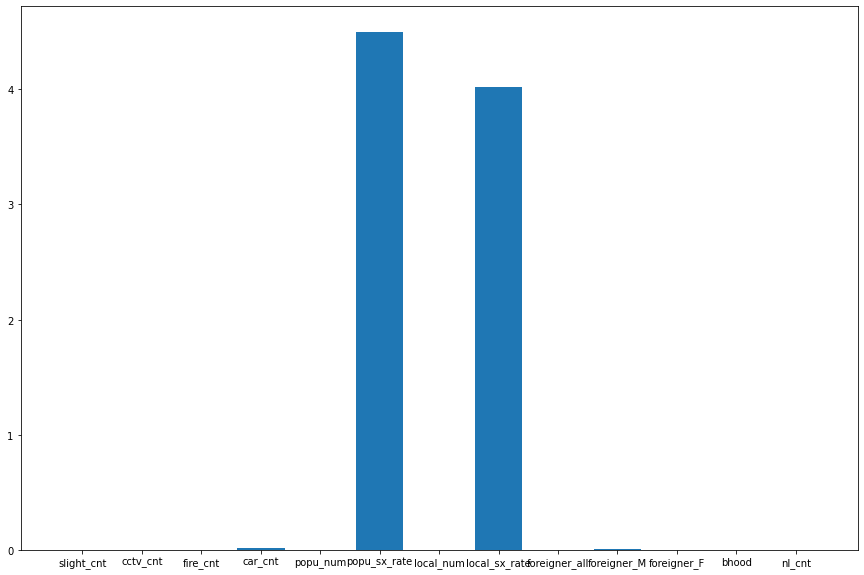

In [11]:
# LinearRegression 모델 생성
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

Y_predict = lr_model.predict(X_test)

# Evaluate the performance of the model. R2
R2 = r2_score(Y_test, Y_predict)

# Print out the model and the performance!!!
print('Y-intercept: ', lr_model.intercept_)
print('Coefficients: ', np.round(lr_model.coef_, 2))
print('test R2-Score ', R2)

plt.figure(figsize=(15,10))
plt.bar(X.columns, np.abs(lr_model.coef_.flatten()))

### Lasso

C:\Users\hrd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.25788811526189, tolerance: 0.02628405575000001
  model = cd_fast.enet_coordinate_descent(


<BarContainer object of 13 artists>

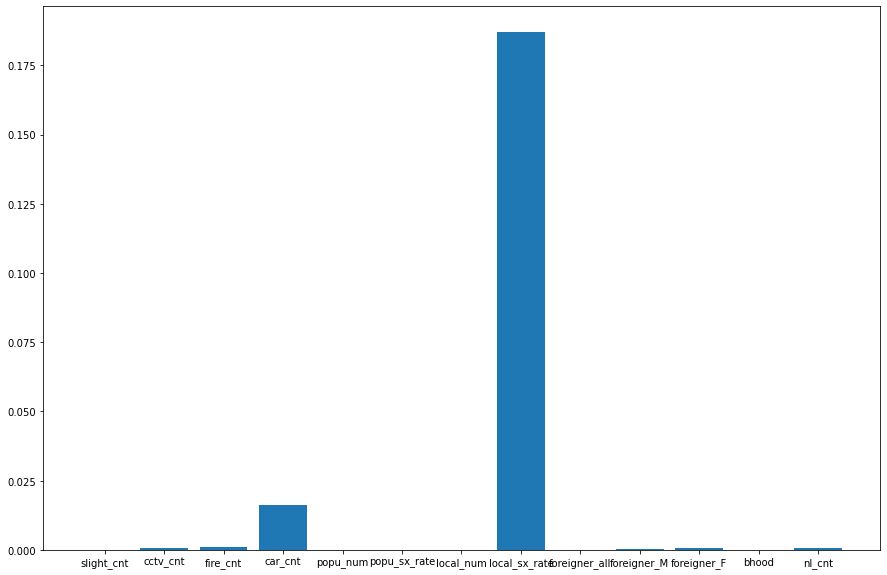

In [12]:
# Lasso

ls_model = Lasso()
ls_model.fit(X,y)

plt.figure(figsize=(15,10))
plt.bar(X.columns, np.abs(ls_model.coef_.flatten()))
# plt.xticks(rotation=45)

### RandomForestRegressor

test R2-Score  0.26428600802548463


<ipython-input-13-15349484beff>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)


<BarContainer object of 13 artists>

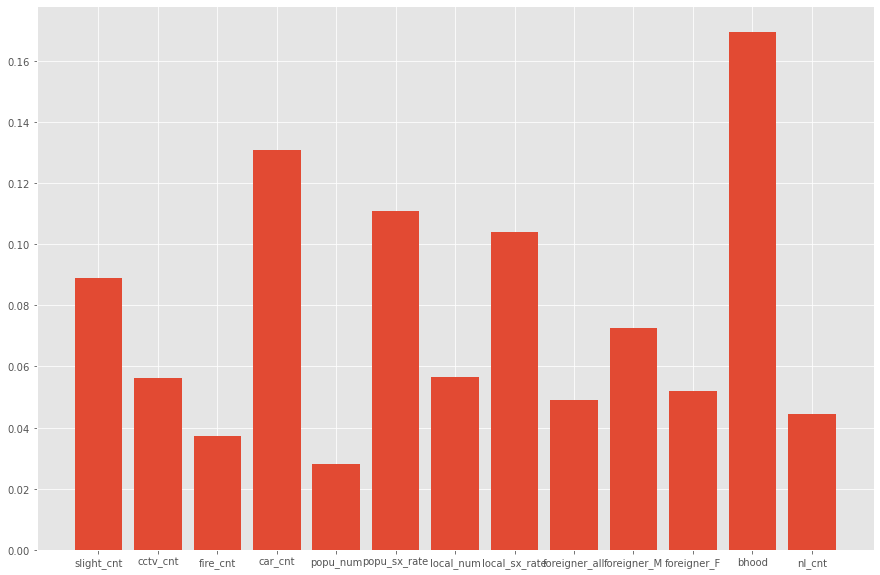

In [13]:
# RandomForestRegressor
rf_model = RandomForestRegressor()
# rf_model.fit(X,y)

rf_model.fit(X_train, Y_train)
Y_predict = rf_model.predict(X_test)

# Evaluate the performance of the model! R2
R2 = r2_score(Y_test, Y_predict)

# Print out the model and the performance!!!
# print('Y-intercept: ', rf_model.intercept_)
# print('Coefficients: ', np.round(rf_model.coef_, 2))
print('test R2-Score ', R2)

plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.bar(X.columns, rf_model.feature_importances_) # 확률값

### SVR

In [14]:
# SVR 

sv_model = SVR(kernel='rbf',C=10)
sv_model.fit(X,y)

# plt.figure(figsize=(15,10))
# plt.bar(X.columns, np.abs(sv_model.coef_.flatten()))
# plt.xticks(rotation=45)

C:\Users\hrd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=10)

### AdaBoost

In [16]:
def rmse(x,y):
    return np.sqrt(mse(x,y))

train_R2:  0.9476648832308444
test_R2 : 0.8516730750155029
test_RMSE:  0.7394320974526338


C:\Users\hrd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<BarContainer object of 13 artists>

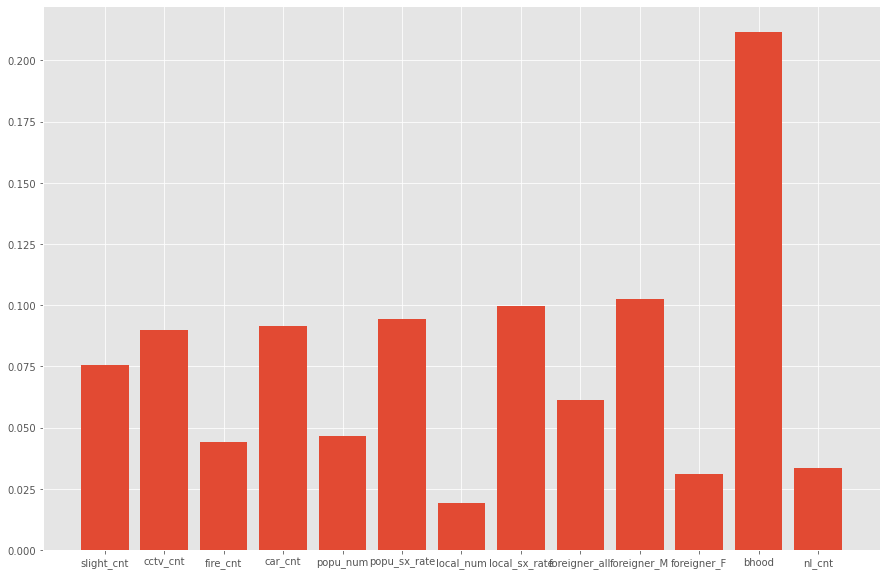

In [18]:
# AdaBoost

# model = AdaBoostRegressor(base_estimator='linear')
ab_model = AdaBoostRegressor(base_estimator=None, n_estimators=50, random_state=113)
ab_model.fit(X_train, Y_train)
print('train_R2: ', ab_model.score(X_train, Y_train)) #

# X 데이터로 y 예측 
y_predict = ab_model.predict(X_train)

## X_test로 y 예측
y_predict2 = ab_model.predict(X_test)

##### 모델 평가
print('test_R2 :', ab_model.score(X_test, Y_test))
print('test_RMSE: ', rmse(y_predict2,Y_test))

plt.figure(figsize=(15,10))
plt.bar(X.columns, ab_model.feature_importances_) 

# 번외.

### Feature Imfortance
* 중요한 변수 선별

In [21]:
ind = ['slight_cnt', 'cctv_cnt', 'fire_cnt', 'car_cnt', 
       'popu_sx_rate', 'local_sx_rate', 'foreigner_all',
       'foreigner_M', 'foreigner_F', 'bhood', 'nl_cnt']

C:\Users\hrd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ab_model2_RMSE:  0.47440993553557465
0.9775575546487543
0.4642006312557111


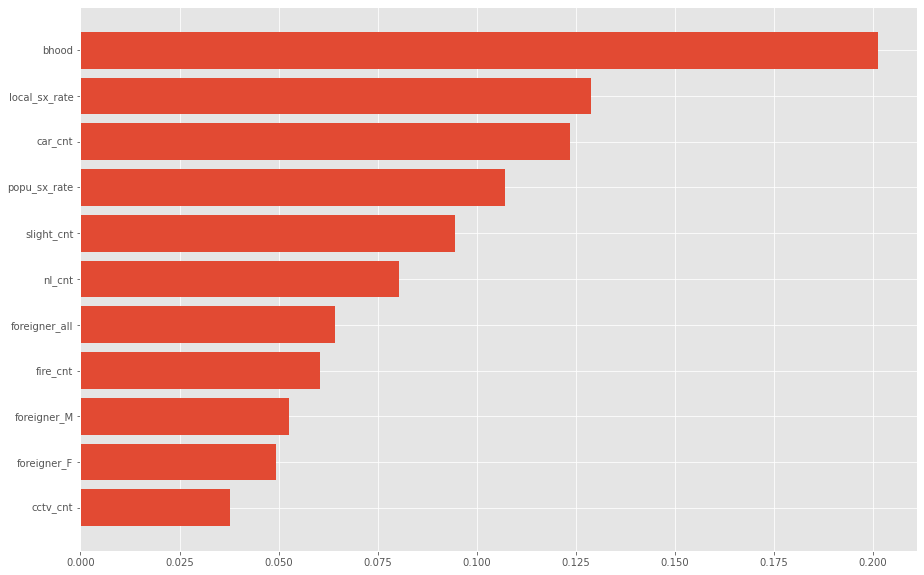

In [24]:
ab_model2 = AdaBoostRegressor(base_estimator=None, n_estimators=50, random_state=113)
ab_model2.fit(X_train[ind], Y_train)

# 피쳐중요도 값 내림차순 
d = {'ind': ind, 'feature_importances_': ab_model2.feature_importances_}
fi_df = pd.DataFrame(data=d).sort_values(by='feature_importances_', ascending=True)
fi_df

# 가로 막대 그래프 그리기 
plt.figure(figsize=(15,10))
plt.barh(fi_df.ind, fi_df.feature_importances_) 

print('ab_model2_RMSE: ', rmse(ab_model2.predict(X_train[ind]), Y_train))
print(ab_model2.score(X_train[ind], Y_train)) 
print(ab_model2.score(X_test[ind], Y_test))

In [28]:
## y 예측값 
Y_hat = ab_model2.predict(X_train[ind])

## Performance Evaluation

#### RMSE

In [193]:
from sklearn.metrics import mean_squared_error as mse

def rmse(x,y):
    return np.sqrt(mse(x,y))

## train_X 데이터로 y예측
model_list = [lr_model, rf_model, ls_model, sv_model]
for i in range(len(model_list)):
    print('{}'.format(model_list[i]),': ', np.round(rmse(model_list[i].predict(X),y), 3))

# sv_model.get_params()

## test_X 데이터로 y 예측
print('test_RMSE: ', rmse(ab_model.predict(X_test), y))

LinearRegression() :  1.273
RandomForestRegressor() :  0.792
Lasso() :  1.346
SVR(C=10) :  2.161
test_RMSE:  1.15210567275123


In [179]:
print(Y_test_ind, "MSE:", mse(y, y_predict2)**0.5)

['overall_q5'] MSE: 1.15210567275123


#### R2

In [199]:
## R2 직접 구하기 
tyl = []
ttl = []

for i in range(df.shape[0]):
    ty = real_df[' rob_satety_q1'][i] - df_pred_Y['pred_ rob_satety_q1'][i]
    tt = real_df[' rob_satety_q1'][i] - real_df.mean()[0]
    tyl.append(ty**2)
    ttl.append(tt**2)
    return 1 - (sum(tyl) / sum(ttl))